<a href="https://colab.research.google.com/github/jhengineer/DeepLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
LinearRegression 매우 중요하다!!
훈련데이터들을 잘 대변하는 직선방정식이다. 데이터를 가장 잘 설명하는 직선(혹은 초평면)을 찾는 방법.
LinearRegression 이라는 class로 sklearn에서 제공한다.
'''

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#fit 하기 전에 학습데이터를 컬럼 벡터로 만들어준다. 세로 한줄 왜냐면 특성이 하나니까.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

lr= LinearRegression()
lr.fit(train_input, train_target)
q= lr.predict([[50]]) #input = colum vector 로
print(q)
print(lr.coef_, lr.intercept_) # listed in order, 기울기와 절편.



[1241.83860323]
[39.01714496] -709.0186449535477


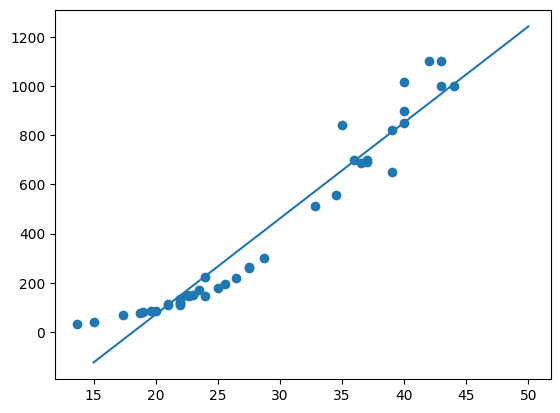

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
#plot 은 선 그리는 함수 인데, x는 15,50 y는 ax+b에서 x에다가 각각 15, 50을 대입한값.

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

'''
train score 와 test score 점수차가 크고,
issue는!!!
x가 15이하면 y 가 음수가 나온다. 문제다!!
이 모델은 직선 방정식보다는 2차 방정식 곡선이 맞다.
'''

0.939846333997604
0.8247503123313558


'\ntrain score 와 test score 점수차가 크고, \nissue는!!!\nx가 15이하면 y 가 음수가 나온다. 문제다!!\n이 모델은 직선 방정식보다는 2차 방정식 곡선이 맞다.\n'

In [ ]:
'''
#다항 리그레션..
곡선 모델로 바꿔 보자
ax제곱 + bx +c 로 만드려면, x제곱 data가 필요하다,
여기서는 농어 길이가 x이므로, 농어 길이 제곱 data를 만들어 준다.
'''

#여러 배열을 열 방향으로(column-wise) 붙여서 2차원 배열을 만들어주는 함수
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))


lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)
#sklearn에서 변수 끝에 _ 붙은것은 모델이 스스로 찾은값에 붙여진다.!!!!
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 약간 과소 적합되었다.. underfitting 되었다.. train 값이 작아서..


print(lr.predict([[50**2, 50]]))


[  1.01433211 -21.55792498] 116.0502107827827
0.9706807451768623
0.9775935108325122
[1573.98423528]


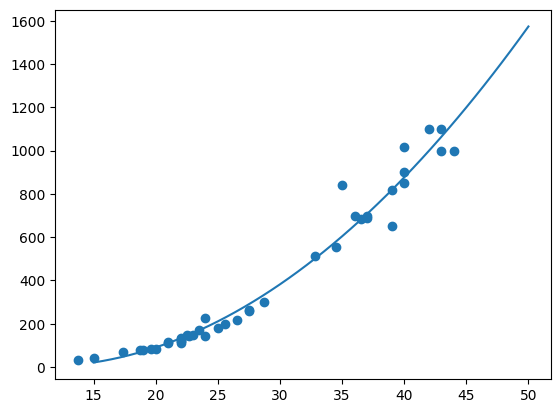

In [ ]:
plt.scatter(train_input, train_target)
x = np.linspace(15, 50)
y = lr.coef_[0]*x*x + lr.coef_[1]*x + lr.intercept_
plt.plot(x, y)